In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#classification Adelie Penguins for measurments 
> Classifying using neural networks - a prelimenary investigation

In this notebook, we use the paler penguins dataset to classify penguins into species based on their measurements. We use a neural network trained on the measurements of the penguins(bill length, bill dept, flipper length, and body mass) to classify the penguins into Adelie and not Adelie.

<p style="color: red;"> The cat in the hat"</p>



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Get dataset
dataset_url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
df = pd.read_csv(dataset_url)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
# Get dataset info
df_shape = print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}\n")
df_columns = print(f"columns in datset: {df.columns.tolist()}\n")
df_info = print(df.info())

Number of rows: 344, Number of columns: 8

columns in datset: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None


In [9]:
df.isna().sum().to_frame(name='missing').assign(percent=lambda x: 100 * x['missing'] / len(df))

,missing,percent
species,0,0.000000
island,0,0.000000
bill_length_mm,2,0.581395
bill_depth_mm,2,0.581395
flipper_length_mm,2,0.581395
body_mass_g,2,0.581395
sex,11,3.197674
year,0,0.000000


## Drop Missing Values
For simplicity in this demo, we’ll drop rows with missing values.

In [10]:
# Drop rows with missing values
df = df.dropna()
df.shape

(333, 8)

## Class Distribution
We'll predict whether a penguin is an **Adelie** or not. Let's check class balance.

In [5]:
# get value counts for the species and plot a bar chart
df['species'].value_counts().plot(kind='bar')

NameError: name 'df' is not defined

<Axes: title={'center': 'Distribution of Adelie'}, xlabel='Adelie', ylabel='Count'>

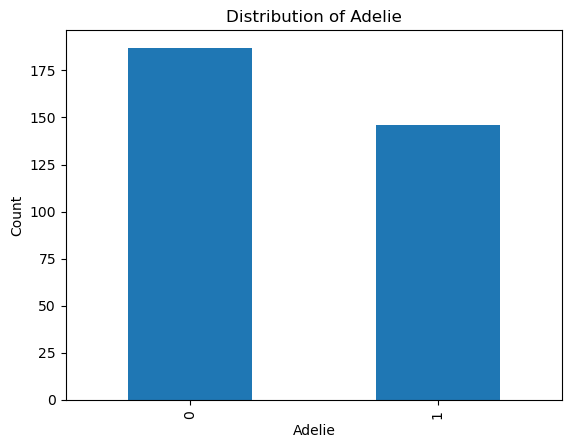

In [11]:
# make adelie the target variable
df['is_adelie'] = (df['species'] == 'Adelie').astype(int)

# make plot to show the distribution of the target variable
df['is_adelie'].value_counts().plot(kind='bar', xlabel='Adelie', ylabel='Count', title='Distribution of Adelie')

## Exploratory Data Analysis
We examine how the features vary by class using scatterplots.

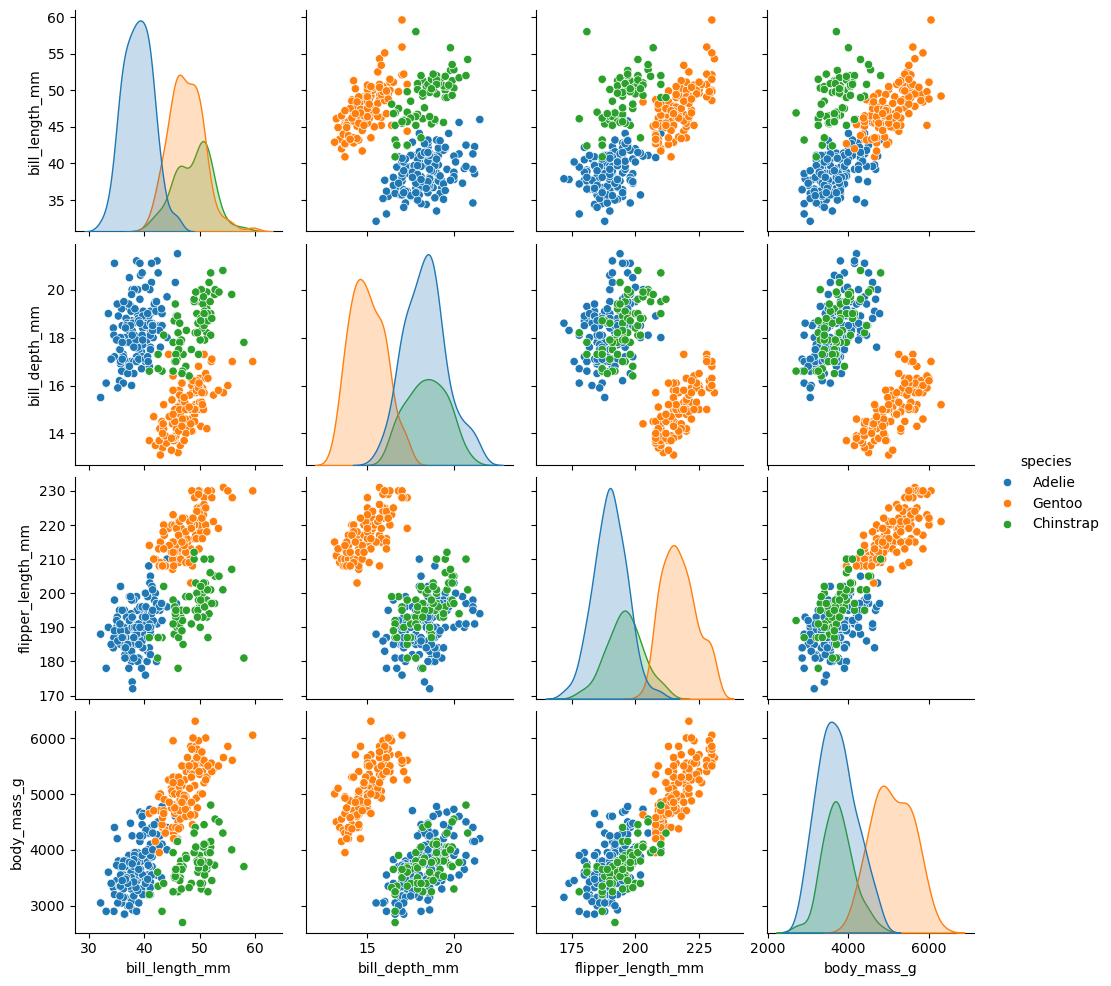

In [12]:
#
sns.pairplot(df, vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], hue='species')
plt.show()

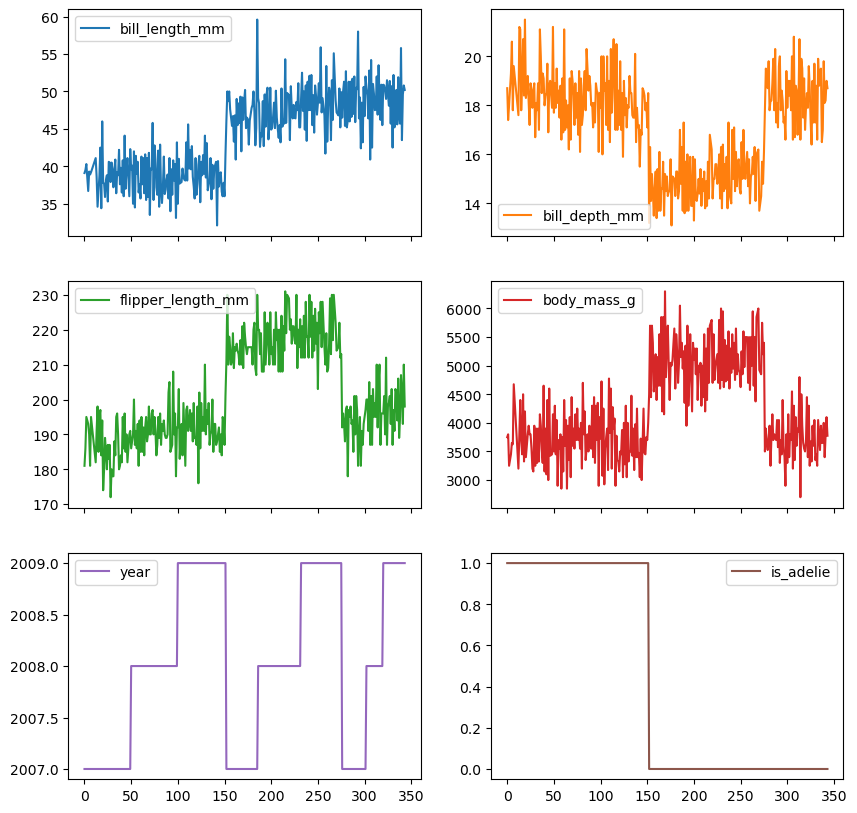

In [13]:
#
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns].plot(subplots=True, figsize=(10, 10), layout=(3, 2));

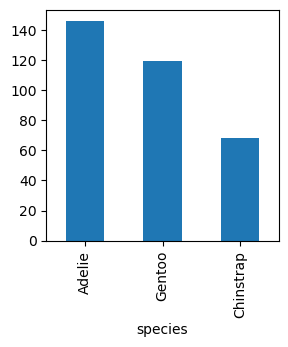

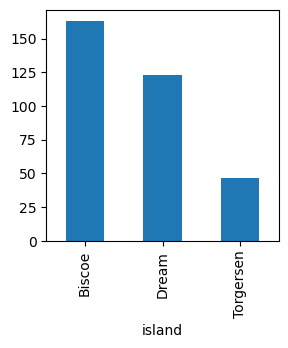

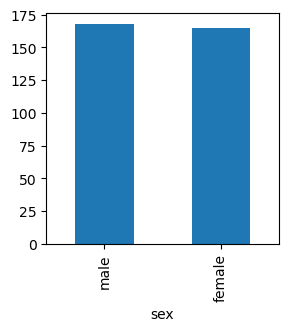

In [14]:
#
categorical_columns = df.select_dtypes(include=["object"]).columns

# plot categorical columns individually
for column in categorical_columns:
    df[column].value_counts().plot(kind='bar', figsize=(3, 3))
    plt.show()

## Modeling

In [15]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np

In [16]:
# 
test_size = 0.2
random_state = 42
train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state)

In [17]:
# 
predictors = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = train_df[predictors]
y = train_df['is_adelie']

In [18]:
# 
pipe = Pipeline([
    #('scaler', StandardScaler()),
    ('nn', MLPClassifier(
        hidden_layer_sizes=(4,), 
        activation='relu', 
        solver='adam', 
        max_iter=500, 
        random_state=42))
])

# Setup stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Actually do the cross-validation
results = cross_validate(pipe, X, y, cv=cv, scoring=scoring, return_estimator=True)

## Evaluation Metrics

In [19]:
for metric in scoring:
    print(f"{metric.capitalize()}: {np.mean(results[f'test_{metric}']):.3f} ± {np.std(results[f'test_{metric}']):.3f}")

Accuracy: 0.432 ± 0.003
Precision: 0.432 ± 0.003
Recall: 1.000 ± 0.000
F1: 0.604 ± 0.003


## Classification Report

In [20]:
X_test = test_df[predictors]
y_test = test_df['is_adelie']

# Choose a model (not that you should do it this way)
last_model = results['estimator'][-1]

# Get predictions
y_pred = last_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.46      1.00      0.63        31

    accuracy                           0.46        67
   macro avg       0.23      0.50      0.32        67
weighted avg       0.21      0.46      0.29        67



/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
